In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,recall_score
import itertools
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

In [2]:
# 数据导入与查看
data = pd.read_csv("./taiwan_bankrupt_data.csv")

In [3]:
#初步查看数据
print(data.keys())

Index(['Bankrupt', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit 

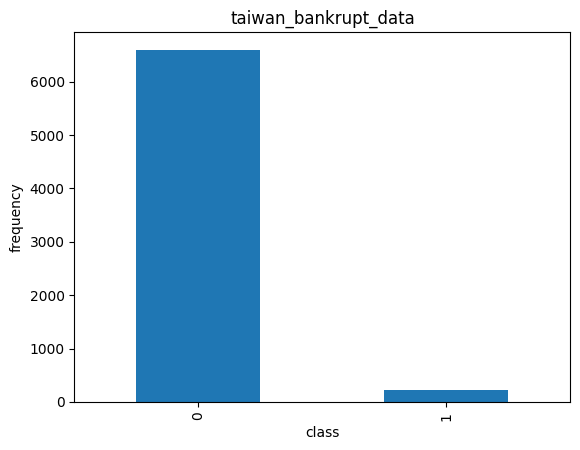

In [4]:
# 查看标签分布
count_classes = pd.value_counts(data['Bankrupt'], sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title("taiwan_bankrupt_data")
plt.xlabel("class")
plt.ylabel("frequency")
plt.show()

In [5]:
# # # #数据标准化处理
# data['Total assets to GNP price']=StandardScaler().fit_transform(data['Total assets to GNP price'].values.reshape(-1,1))

In [6]:
X = data.iloc[:, data.columns != 'Bankrupt']
y = data.iloc[:, data.columns == 'Bankrupt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#上采样
oversampler=SMOTE(random_state=0)
X_train,y_train=oversampler.fit_resample(X_train,y_train)

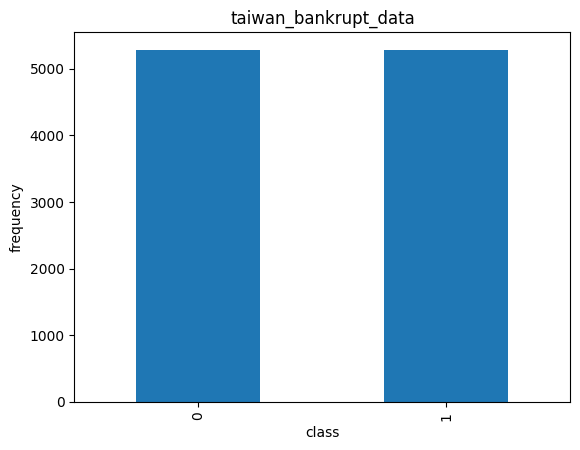

In [8]:
# 查看标签分布
count_classes = pd.value_counts(y_train['Bankrupt'], sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title("taiwan_bankrupt_data")
plt.xlabel("class")
plt.ylabel("frequency")
plt.show()

In [9]:
#进一步查看感兴趣的数据
X_train.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,...,10572.000000,1.057200e+04,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.0,10572.000000
mean,0.464056,0.510534,0.509953,0.603763,0.603778,0.998745,0.796960,0.808840,0.303244,0.781167,...,0.775070,4.107813e+07,0.623795,0.603762,0.832353,0.289102,0.028004,0.565370,1.0,0.036789
std,0.076784,0.091788,0.081953,0.015336,0.015311,0.010448,0.010398,0.011040,0.009165,0.010243,...,0.063389,4.886592e+08,0.009739,0.015336,0.046840,0.045918,0.015420,0.009742,0.0,0.047573
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.133503,0.000000,0.000000,1.0,0.000000
25%,0.431158,0.474752,0.476219,0.597269,0.597305,0.998859,0.797069,0.809013,0.303224,0.781258,...,0.755268,1.227477e-03,0.623269,0.597266,0.835116,0.278261,0.026629,0.564491,1.0,0.018204
50%,0.469751,0.526222,0.519549,0.602084,0.602096,0.998969,0.797334,0.809261,0.303439,0.781511,...,0.788786,3.086031e-03,0.623751,0.602081,0.839488,0.282067,0.026791,0.565172,1.0,0.023956
75%,0.505509,0.562255,0.555117,0.609421,0.609407,0.999037,0.797473,0.809383,0.303534,0.781642,...,0.811860,7.819703e-03,0.624098,0.609420,0.841421,0.287367,0.026915,0.565897,1.0,0.037078
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.982879,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,0.736985,1.0,1.000000


In [10]:
X_train = np.array(X_train,type(float))

In [11]:
#去离群值
X_train [:,0]=np.minimum(X_train[:,0],0.8)
X_train [:,1]=np.minimum(X_train[:,1],0.8)
X_train [:,2]=np.minimum(X_train[:,2],0.8)
X_train [:,3]=np.minimum(X_train[:,3],0.8)
X_train [:,4]=np.minimum(X_train[:,4],0.8)
# X_train [:,5]=np.minimum(X_train[:,5],20)
# X_train [:,6]=np.minimum(X_train[:,6],22)
# X_train [:,7]=np.minimum(X_train[:,7],2)
X_train [:,8]=np.minimum(X_train[:,8],0.6)
# X_train [:,9]=np.minimum(X_train[:,9],2)
# X_train [:,10]=np.minimum(X_train[:,10],2)
# X_train [:,11]=np.minimum(X_train[:,11],1.5)
# X_train [:,12]=np.minimum(X_train[:,12],2)
# X_train [:,13]=np.minimum(X_train[:,13],2)
# X_train [:,14]=np.minimum(X_train[:,14],2)
X_train [:,15]=np.minimum(X_train[:,15],0.6)
X_train [:,16]=np.minimum(X_train[:,16],0.1)
# X_train [:,17]=np.minimum(X_train[:,17],3)
# X_train [:,18]=np.minimum(X_train[:,18],3)
X_train [:,19]=np.minimum(X_train[:,19],0.1)

In [12]:
bag_clf=BaggingClassifier(SVC(),n_estimators=10,bootstrap=True,max_samples=0.5)

bag_clf.fit(X_train,y_train)
y_pred=bag_clf.predict(X_test)
# print(y_pred)

cm = confusion_matrix(y_test, y_pred)
TP = cm[0][0] 
FN = cm[0][1] 
FP = cm[1][0] 
TN = cm[1][1]
acc = (TP + TN) / (TP + FN + FP + TN)
print(bag_clf.__class__.__name__,'准确率=',acc)
sensitivity = TP / (TP + FN)
print(bag_clf.__class__.__name__,'sensitivity=',sensitivity)
specificity = TN / (TN + FP)
print(bag_clf.__class__.__name__,'specificity=',specificity)
precision=TP/(TP+FP)
print(bag_clf.__class__.__name__,'precision=',precision)
F1_score=2*precision*sensitivity/(precision+sensitivity)
print(bag_clf.__class__.__name__,'F1_score=',F1_score)
print(classification_report(y_test,y_pred ))

C:\Users\20450\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\20450\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


BaggingClassifier 准确率= 0.7543988269794721
BaggingClassifier sensitivity= 0.763899466869764
BaggingClassifier specificity= 0.5098039215686274
BaggingClassifier precision= 0.97568093385214
BaggingClassifier F1_score= 0.8568987612131568
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      1313
           1       0.08      0.51      0.13        51

    accuracy                           0.75      1364
   macro avg       0.53      0.64      0.50      1364
weighted avg       0.94      0.75      0.83      1364



<Figure size 640x480 with 0 Axes>

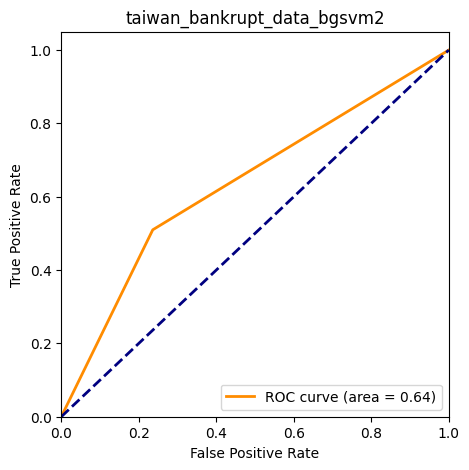

In [13]:
#ROC曲线
# 计算
fpr, tpr, thread = roc_curve(y_test, y_pred)
roc_auc= auc(fpr, tpr)
# 绘图
plt.figure()
lw = 2
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('taiwan_bankrupt_data_bgsvm2')
plt.legend(loc="lower right")
plt.show()